In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
datapath = "../Data/FA_PM/fa_pm_merged_data.csv"
fa_pm = pd.read_csv(datapath)
fa_pm['food_insecurity_num_2018'] = fa_pm['food_insecurity_num_2018'].apply(lambda x: int(x.replace(',','')))
fa_pm['food_insecurity_num_2020'] = fa_pm['food_insecurity_num_2020'].apply(lambda x: int(x.replace(',','')))
#fa_pm.drop(['Unnamed: 0'], axis = 1, inplace = True)
fa_pm.head()

,Tract,fips,state,total_population,food_insecurity_rate_2018,food_insecurity_num_2018,food_insecurity_rate_2020,food_insecurity_num_2020,food_insecurity_num_change_2020,unemployment_change,...,proportion_bachelors_degree,proportion_disabled,proportion_hispanic,prop_men,prop_nonwhite,prop_nonenglish_speaking,prop_families_poverty,prop_students_in_public_school,social_vulnerability_index,thiel_racial_segregation_index
0,"Census Tract 1001, Cook County, Illinois",17031,IL,"5,563",0.099,550,0.149,820,270,0.07,...,26.32,10.84,16.07,48.30,4.31,12.54,6.60,53.92,0.36,0.24
1,"Census Tract 1002, Cook County, Illinois",17031,IL,"6,872",0.060,410,0.110,750,340,0.07,...,22.21,6.48,11.04,47.22,10.84,5.79,11.35,79.56,0.34,0.20
2,"Census Tract 1003, Cook County, Illinois",17031,IL,"6,186",0.074,460,0.123,770,310,0.07,...,25.82,17.10,10.17,44.94,11.75,7.64,2.00,68.25,0.30,0.22
3,"Census Tract 1004, Cook County, Illinois",17031,IL,"3,364",0.055,180,0.104,350,170,0.07,...,28.45,8.98,13.97,51.25,7.52,3.97,0.93,68.16,0.27,0.15
4,"Census Tract 1005, Cook County, Illinois",17031,IL,"5,696",0.052,290,0.101,570,280,0.07,...,25.93,12.90,10.45,47.82,12.34,14.19,0.00,68.67,0.28,0.20


In [48]:
print(fa_pm.shape)
print(fa_pm.columns)

(1319, 32)
Index(['Tract', 'fips', 'state', 'total_population',
       'food_insecurity_rate_2018', 'food_insecurity_num_2018',
       'food_insecurity_rate_2020', 'food_insecurity_num_2020',
       'food_insecurity_num_change_2020', 'unemployment_change',
       'local_census_tract', 'avg_household_size', 'avg_travel_time_to_work',
       'computer_access', 'life_expectancy', 'median_age',
       'median_home_loan_amount', 'median_home_value',
       'median_household_income', 'median_leverage_ratio', 'num_jobs',
       'num_housing_units', 'proportion_bachelors_degree',
       'proportion_disabled', 'proportion_hispanic', 'prop_men',
       'prop_nonwhite', 'prop_nonenglish_speaking', 'prop_families_poverty',
       'prop_students_in_public_school', 'social_vulnerability_index',
       'thiel_racial_segregation_index'],
      dtype='object')


In [12]:
modelling_cols = [
       'avg_household_size', 'avg_travel_time_to_work', 'computer_access',
       'life_expectancy', 'median_age', 'median_home_loan_amount',
       'median_home_value', 'median_household_income', 'median_leverage_ratio',
       'num_jobs', 'num_housing_units', 'proportion_bachelors_degree',
       'proportion_disabled', 'proportion_hispanic', 'prop_men',
       'prop_nonwhite', 'prop_nonenglish_speaking', 'prop_families_poverty',
       'prop_students_in_public_school', 'social_vulnerability_index',
       'thiel_racial_segregation_index']
fa_pm[modelling_cols].hist(bins = 30, figsize = (17,15))

From the above plots, we can gain the following insights:
- average household size has a bell-shaped distribution, with the avg. household size in cook county being 2.5
- average travel time to work has a bell-shaped distribution, with avg = 35 mins, but there is a massive peak around 37mins.
- computer access is left-skewed. 
- life expectancy is also left-skewed
- median_age has a step pattern, but is centered, and has a rough bell shape
- home loan amount is right skewed
- home value is right skewed
- household income is right skewed
- leverage ratio is centered, and well-distributed
- num housing units is right skewed
- num jobs has a massive peak at 0 (almost all the mass). this might not make a good predictor.
- prop_families poverty is right skewed with a nice stepwise pattern
- prop_men is well-centered, and has a bellshaped distribution
- prop_nonenglish speaking is right skewed (interestingly the pattern follows very closely the prop_hispanic)
- prop_nonwhite follows an S-pattern, with some tracts being entirely nonwhite! (~100%)
- prop in public school is heavily left skewed
- prop_bachelor's degree is right skewed
- proportion disabled is centered, and bellshaped
- prop_hispanic is highly right-skewed
- social_vulnerability follows a funny pattern with several peaks
- racial_segregration is bell-shaped and centered (maybe a slight right skew)



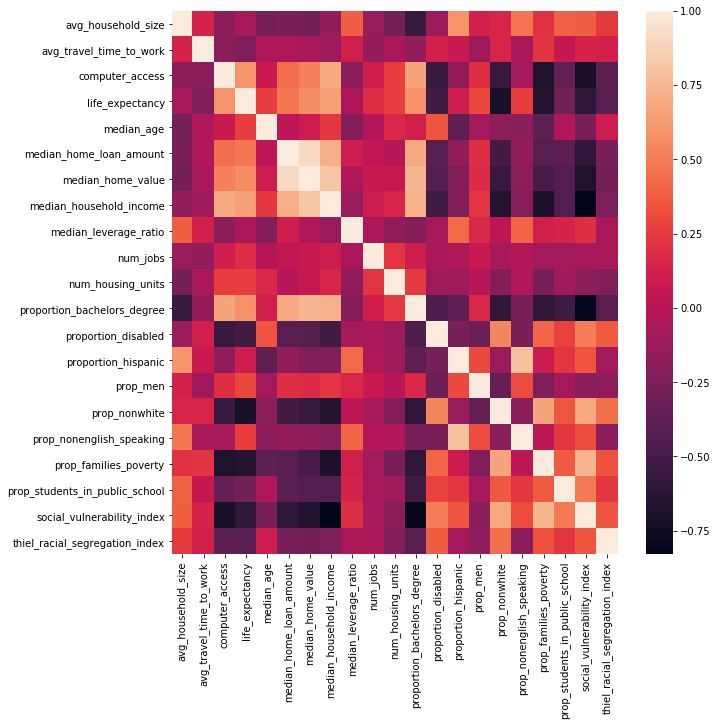

In [50]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(fa_pm[modelling_cols].corr(), ax = ax)

In [51]:
for col in modelling_cols:
    print(col)
    sorted_corr = fa_pm[modelling_cols].corr()[col].apply(lambda x: abs(x)).sort_values(ascending = False)
    orig_corr = fa_pm[modelling_cols].corr()[col]
    top_n = sorted_corr.index[1:6]
    for other_col in top_n:
        print(other_col, orig_corr.loc[other_col])
    print('-------')   


avg_household_size
proportion_hispanic 0.5973057962058136
proportion_bachelors_degree -0.5577041839140697
prop_nonenglish_speaking 0.47518413987921093
prop_students_in_public_school 0.3855859425685631
median_leverage_ratio 0.3791131971576891
-------
avg_travel_time_to_work
life_expectancy -0.2400322833141025
prop_families_poverty 0.21590216511698468
computer_access -0.1898271928333366
prop_nonwhite 0.15566123727754894
num_jobs -0.15165386109150172
-------
computer_access
social_vulnerability_index -0.7104125587374268
median_household_income 0.6895394949059441
prop_families_poverty -0.6805617055191215
proportion_bachelors_degree 0.6669443477788628
life_expectancy 0.5929226108295246
-------
life_expectancy
prop_nonwhite -0.7114356239248643
prop_families_poverty -0.6555033157999018
median_household_income 0.6430039140058058
social_vulnerability_index -0.6068846770238433
computer_access 0.5929226108295246
-------
median_age
prop_families_poverty -0.38511814789376464
proportion_hispanic -0.

The following correlations are worthy of notice:
- avg household size is positively correlated (>0.6) with proportion hispanic, negatively with proportion bachelors degree, positively with prop nonenglish speaking
- computer access is negatively correlated (<-0.7) with social_vulnerability, positively with median_household income, negatively with prop_families_poverty, positively with prop_bachelor's degree, positively with life_expectancy
- life_expectancy is negatively corr with prop_nonwhite, negatively with prop_families_poverty, positively with household_income, negatively with social vulnerability, and positively with computer access
- home_loan_amount is strongly positively associated with home_value, household_income, prop_bachelor's degree, negatively with social_vulnerability. 
- median_home_value is positively associated with prop_bachelors_degree, and negatively with social vulnerability
- household_income negatively correlated with social_vulnerability
- prop_disabled is negatively corr with computer_access, positively corr with prop_nonwhite
- prop_hispanic is strong positively corr with prop_nonenglish speaking, household_size
- prop_nonwhite is negatively corr with life_expectancy, positively with social vulnerabilty, and poverty


In [52]:
# Find out the variables with the highest correlations with the food insecurity rate in 2020
corr_df = fa_pm.corr()
corr_df1 = corr_df['food_insecurity_rate_2020'][abs(corr_df['food_insecurity_rate_2020'])>=0.5]
corr_df1

food_insecurity_rate_2018      0.999986
food_insecurity_num_2018       0.593259
food_insecurity_rate_2020      1.000000
computer_access               -0.696281
life_expectancy               -0.761816
median_home_value             -0.517237
median_household_income       -0.715284
proportion_bachelors_degree   -0.561098
proportion_disabled            0.617030
prop_nonwhite                  0.809974
prop_families_poverty          0.851427
social_vulnerability_index     0.719897
Name: food_insecurity_rate_2020, dtype: float64

The following variables are strongly positively associated with food insecurity:
- prop_disabled
- prop_nonwhite
- prop_families in poverty
- social vulnerability index

The following variables are strongly negatively associated with food insecurity:
- computer access
- life expectancy
- median home value
- median household income
- prop bachelor's degree





In [53]:
#find variables strongly associated with food_insecurity_num_2020
corr_df2 = corr_df['food_insecurity_num_2020'].sort_values(ascending= False)
corr_df2

food_insecurity_num_2020           1.000000e+00
food_insecurity_num_2018           9.732618e-01
food_insecurity_num_change_2020    6.049230e-01
num_housing_units                  5.388670e-01
social_vulnerability_index         4.909845e-01
food_insecurity_rate_2018          4.281980e-01
food_insecurity_rate_2020          4.281146e-01
prop_nonwhite                      4.024028e-01
prop_families_poverty              3.805584e-01
proportion_disabled                2.684108e-01
prop_students_in_public_school     2.520572e-01
avg_travel_time_to_work            1.736252e-01
thiel_racial_segregation_index     1.584622e-01
avg_household_size                 1.333590e-01
local_census_tract                 7.511888e-02
num_jobs                           4.163496e-02
prop_nonenglish_speaking           3.118388e-02
unemployment_change               -5.158455e-16
proportion_hispanic               -8.058247e-04
median_leverage_ratio             -8.972743e-03
median_age                        -1.349

the following should be used as a modelling variables:
- food_insecurity_num_2018 (0.97)
- num_housing_units (0.5388)
- social_vulnerability_index (0.49)
- median_household_income (-0.4245)
- prop_nonwhite (0.4024)
- median_home_value (-0.408)
- median_home_loan_amount (-0.409)
- prop_families_poverty (0.381)
- proportion_bachelors_degree (-0.3775)
- life_expectancy (-0.3045)


the following may be optionally added
- prop_disabled (0.268)
- prop_students_in_public_school (0.252)
- avg_travel_time_to_work (0.173)
- thiel_racial_segregation_index (0.158)
- avg_household_size (0.133)
- median_age (-0.135)
- prop_men (-0.138)


In [ ]:
#find center, spread for each variable
for col in modelling_cols:
    print(col)
    print("        min:", fa_pm[col].min())
    print("        mean:", fa_pm[col].mean())
    print("        median:", fa_pm[col].median())
    print("        max:", fa_pm[col].max())
    print("        std. dev.:", fa_pm[col].std())
    print("----------")

In [62]:
modelling_set = ['food_insecurity_num_2018', 'num_housing_units', 'social_vulnerability_index',
'median_household_income', 'prop_nonwhite', 'median_home_value', 'median_home_loan_amount', 'prop_families_poverty',
'proportion_bachelors_degree', 'life_expectancy']
fa_pm[modelling_set].drop('food_insecurity_num_2018', axis = 1).corr()

,num_housing_units,social_vulnerability_index,median_household_income,prop_nonwhite,median_home_value,median_home_loan_amount,prop_families_poverty,proportion_bachelors_degree,life_expectancy
num_housing_units,1.000000,-0.195398,0.154315,-0.218887,0.067181,-0.003795,-0.268227,0.236762,0.257101
social_vulnerability_index,-0.195398,1.000000,-0.829838,0.680315,-0.673643,-0.602270,0.741146,-0.802769,-0.606885
median_household_income,0.154315,-0.829838,1.000000,-0.654472,0.808543,0.712577,-0.687115,0.724566,0.643004
prop_nonwhite,-0.218887,0.680315,-0.654472,1.000000,-0.565244,-0.506892,0.670953,-0.597476,-0.711436
median_home_value,0.067181,-0.673643,0.808543,-0.565244,1.000000,0.908606,-0.483852,0.744425,0.566267
median_home_loan_amount,-0.003795,-0.602270,0.712577,-0.506892,0.908606,1.000000,-0.410100,0.690737,0.481578
prop_families_poverty,-0.268227,0.741146,-0.687115,0.670953,-0.483852,-0.410100,1.000000,-0.600765,-0.655503
proportion_bachelors_degree,0.236762,-0.802769,0.724566,-0.597476,0.744425,0.690737,-0.600765,1.000000,0.580121
life_expectancy,0.257101,-0.606885,0.643004,-0.711436,0.566267,0.481578,-0.655503,0.580121,1.000000


In [27]:
#### NOW ANALYZE EVANSTON ONLY
fa_pm_evanston = pd.read_csv("../Data/Modelling Data/fa_pm_evanston-model.csv")
fa_pm_evanston.drop(['Unnamed: 0'], axis = 1, inplace = True)
#fa_pm_evanston['food_insecurity_num_2018'] = fa_pm_evanston['food_insecurity_num_2018'].apply(lambda x: int(x.replace(',','')))
fa_pm_evanston['food_insecurity_num_2020'] = fa_pm_evanston['food_insecurity_num_2020'].apply(lambda x: int(x.replace(',','')))

fa_pm_evanston.head()


,Tract,fips,state,total_population,food_insecurity_rate_2018,food_insecurity_num_2018,food_insecurity_rate_2020,food_insecurity_num_2020,food_insecurity_num_change_2020,unemployment_change,...,proportion_bachelors_degree,proportion_disabled,proportion_hispanic,prop_men,prop_nonwhite,prop_nonenglish_speaking,prop_families_poverty,prop_students_in_public_school,social_vulnerability_index,thiel_racial_segregation_index
0,"Census Tract 8087.02, Cook County, Illinois",17031,IL,"5,255",0.117,620,0.167,880,260,0.07,...,34.86,5.90,9.36,45.40,34.33,5.38,0.00,92.96,0.40,0.04
1,"Census Tract 8088, Cook County, Illinois",17031,IL,"3,732",0.049,180,0.099,360,180,0.07,...,35.40,5.18,3.94,47.91,13.99,5.76,2.87,71.92,0.16,0.25
2,"Census Tract 8089, Cook County, Illinois",17031,IL,"4,175",0.036,150,0.086,360,210,0.07,...,32.18,6.88,4.26,48.12,7.19,3.61,2.24,88.43,0.19,0.25
3,"Census Tract 8090, Cook County, Illinois",17031,IL,"4,153",0.045,190,0.095,400,210,0.07,...,34.32,9.11,1.69,45.94,14.54,3.30,0.00,83.72,0.29,0.29
4,"Census Tract 8091, Cook County, Illinois",17031,IL,"3,293",0.048,160,0.097,320,160,0.07,...,29.65,9.95,4.28,43.40,15.70,3.17,2.33,91.34,0.34,0.24


In [28]:

for col in modelling_cols:
    print(col)
    sorted_corr = fa_pm_evanston[modelling_cols].corr()[col].apply(lambda x: abs(x)).sort_values(ascending = False)
    orig_corr = fa_pm_evanston[modelling_cols].corr()[col]
    top_n = sorted_corr.index[1:6]
    for other_col in top_n:
        print(other_col, orig_corr.loc[other_col])
    print('-------')   


avg_household_size
thiel_racial_segregation_index 0.7355343842687627
median_leverage_ratio 0.7120281381604288
proportion_bachelors_degree -0.700012707568244
proportion_hispanic 0.6938494984695738
prop_nonwhite 0.6454684293951676
-------
avg_travel_time_to_work
median_age 0.6859130231773908
num_jobs -0.6410943852655462
num_housing_units 0.578253436730952
prop_nonwhite -0.3293612162795936
median_household_income 0.32558526542137345
-------
computer_access
social_vulnerability_index -0.7193020515691805
proportion_bachelors_degree 0.6383035977665019
avg_household_size -0.6030956142521473
prop_families_poverty -0.5708918527703234
prop_nonwhite -0.5612398408615484
-------
life_expectancy
prop_families_poverty -0.5773925135908817
prop_nonwhite -0.5693058589346798
median_home_value 0.5433933637699547
computer_access 0.5422691878621813
prop_students_in_public_school -0.50191754671328
-------
median_age
median_household_income 0.7156689067511404
avg_travel_time_to_work 0.6859130231773908
num_job

In [31]:
#find variables strongly associated with food_insecurity_num_2020
corr_df_ev = fa_pm_evanston.corr()
corr_df2_ev = corr_df_ev['food_insecurity_num_2020'].sort_values(ascending= False)
corr_df2_ev

food_insecurity_num_2020           1.000000
food_insecurity_num_2018           0.989360
food_insecurity_rate_2018          0.843216
food_insecurity_rate_2020          0.839937
food_insecurity_num_change_2020    0.807116
social_vulnerability_index         0.708786
prop_nonwhite                      0.567100
prop_nonenglish_speaking           0.555871
proportion_hispanic                0.453487
prop_families_poverty              0.417506
num_jobs                           0.382887
num_housing_units                  0.382456
prop_students_in_public_school     0.275928
proportion_disabled                0.082058
unemployment_change                0.000000
local_census_tract                -0.020055
prop_men                          -0.023758
avg_household_size                -0.048344
median_leverage_ratio             -0.085587
avg_travel_time_to_work           -0.322586
life_expectancy                   -0.361349
computer_access                   -0.417916
proportion_bachelors_degree     

In [38]:
corr_df2_ev.apply(lambda corr : abs(corr)).sort_values(ascending = False).index.to_numpy()

array(['food_insecurity_num_2020', 'food_insecurity_num_2018',
       'food_insecurity_rate_2018', 'food_insecurity_rate_2020',
       'food_insecurity_num_change_2020', 'median_household_income',
       'median_age', 'social_vulnerability_index',
       'median_home_loan_amount', 'median_home_value', 'prop_nonwhite',
       'prop_nonenglish_speaking', 'proportion_hispanic',
       'thiel_racial_segregation_index', 'proportion_bachelors_degree',
       'computer_access', 'prop_families_poverty', 'num_jobs',
       'num_housing_units', 'life_expectancy', 'avg_travel_time_to_work',
       'prop_students_in_public_school', 'median_leverage_ratio',
       'proportion_disabled', 'avg_household_size', 'prop_men',
       'local_census_tract', 'unemployment_change', 'fips'], dtype=object)